# Phase 3 Review

![review guy](https://media.giphy.com/media/3krrjoL0vHRaWqwU3k/giphy.gif)

# TOC 

1. [Gradient Descent](#grad_desc)
2. [Logistic Regression](#logistic)
3. [Confusion Matrix](#con_mat)
4. [Accuracy/Precision/Recall/F1](#more_metric)
5. [auc_roc](#auc_roc)
3. [Algos](#algos)

<a id='grad_desc'></a>

## Gradient Descent

Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


    A loss function shows us how bad our model did at its prediction. The mean squared error is one that: squares the residuals (difference between true and predicted values) and then takes the average of them.

Question: What loss functions do we know and what types of data work best with each?

    Regression for these:
    Mean squared error
    Route Mean squared error
    Mean absolute error - sum of absolute differences between actual/predicted. Measures average magnitude of errors in set of predictions.
    
    Log loss, classification - probability value between 0 and 1.
    cross-entropy loss for multiclass problem

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np

data = load_diabetes(as_frame=True)
X = data['data']
y = data['target']

In [2]:
X.shape

(442, 10)

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
from sklearn.linear_model import SGDRegressor

In [20]:
# Instantiate a SGDRegressor object and run partial fit on X and y. For now, pass the argument `penalty=None`
sgd = SGDRegressor(penalty = None,
                   random_state = 42
                   )
sgd.partial_fit(X, y)

SGDRegressor(penalty=None, random_state=42)

In [21]:
# Inspect the coefficient array
sgd.coef_

array([ 1.01049826,  0.24198769,  2.90134432,  2.14320366,  0.77081638,
        0.7304633 , -2.05367562,  2.07939578,  2.63091055,  1.99806661])

In [7]:
from sklearn.metrics import mean_squared_error

In [18]:
# Import mean_squared_error from metrics, and pass in the true ys, an array of predictions
# and the agrument squared = False
mean_squared_error(y, sgd.predict(X), squared = False)

87.31449433724637

In [22]:
# Repeat the partial fit. Inspect, RMSE, coefficients.
sgd.partial_fit(X, y)
mean_squared_error(y, sgd.predict(X), squared = False), sgd.coef_

(78.37121034017636,
 array([ 1.5976798 ,  0.36865223,  4.76320617,  3.53362552,  1.43599636,
         1.28440793, -3.31009282,  3.44597448,  4.42004556,  3.22147387]))

Pick a coefficient, and explain the gradient descent update.


    After the initial run, the cost of the coefficient is calculated. The derivative is then calculated to get the slope of the function at a given point. The updated coefficient uses that slope to know which direction to move in in order to get a lower cost on its next iteration. 

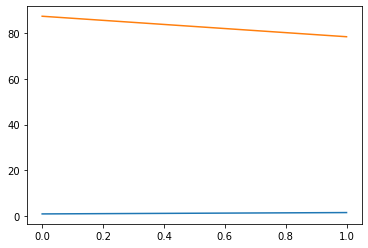

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot([1.01049826, 1.5976798])
ax.plot([87.31449433724637, 78.37121034017636])

In [ ]:
# code

<a id='logistic'></a>

# Logistic Regression and Modeling

What type of target do we feed the logistic regression model?

In [174]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']

In [175]:
from sklearn.model_selection import train_test_split
# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

Question: What is the purpose of train/test split?  


    Gives us the ability to train the data on existing data and also simulate running our model on unseen data.

Question: Why should we never fit to the test portion of our dataset?

    Data leakage, we are trying to simulate running our model on unseen data. If we fit on the test portion, the model will be tuned to the test portion and use that information to fit, artifically inflating our score.

In [176]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Scale the training set using a standard scaler
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

In [177]:
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
287,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-0.542685,-1.655655,-0.589864,-0.525560,-1.510669,-0.891500,-0.750217,-0.916711,-0.925086,-0.808411
512,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.041487,0.689899,0.194128,-0.051934,1.129415,0.923942,1.222217,1.436560,1.149559,1.569111
402,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.435901,-0.148985,-0.320159,-0.446032,-1.634396,-0.106752,-0.539891,-0.723713,0.534970,-0.619348
446,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,1.113515,2.165006,1.165793,0.997696,0.383604,0.860948,1.872819,1.310691,0.152884,0.421636
210,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,1.471556,0.387568,1.556276,1.385595,-0.577759,0.296680,0.595768,1.232995,0.050452,-1.406351


Question: Why is scaling our data important? For part of your answer, relate to one of the advantages of logistic regression over another classifier.

    Scaling the data is important because logistic regression is utilizing coefficients to interpret the weight each feature should hold. (gradient descent/loss function).
    If you use penalty term, regularization, penalty will be by coefficient
    Advantages:
        Can interpret model coefficients as indicators of feature importance
        Less inclined to over-fitting
        Easier to implement, interpret
        Provides measure of how appropriate a predictor (coeff size) is and direction of association (+/-)

In [178]:
from sklearn.linear_model import LogisticRegression
# fit model with logistic regression to the appropriate portion of our dataset
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Now that we have fit our classifier, the object `lr` has been filled up with information about the best fit parameters.  Take a look at the coefficients held in the `lr` object.  Interpret what their magnitudes mean.

In [181]:
# Inspect the .coef_ attribute of lr and interpret
lr.coef_

array([[-0.39751679, -0.41535774, -0.34832129, -0.45142016, -0.20791905,
         0.62039231, -0.73558933, -1.09376305,  0.23601875,  0.08357971,
        -1.28501592,  0.22136641, -0.58858571, -0.89527827, -0.19689721,
         0.63403697, -0.14135554, -0.40058728,  0.5262862 ,  0.73327971,
        -0.84378886, -1.29571675, -0.51790962, -0.82723207, -0.53895662,
         0.12288567, -1.00748469, -0.76642547, -1.21963558, -0.14580732]])

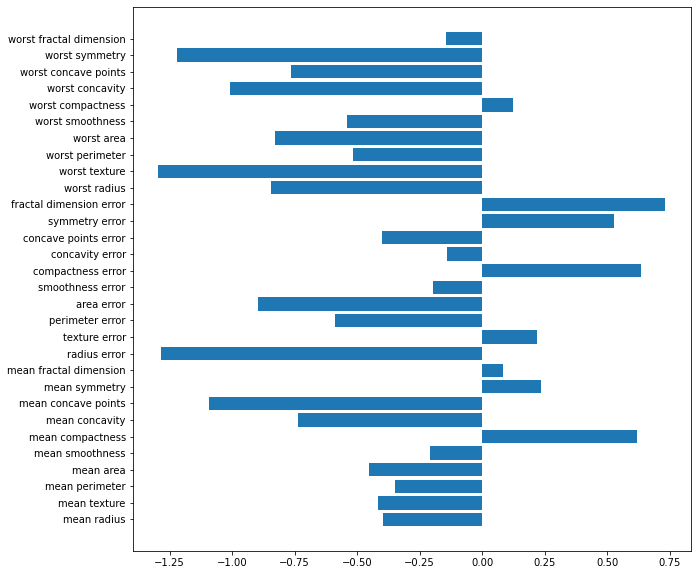

In [183]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(X.columns, lr.coef_[0])
ax.tick_params(axis='x')

Logistic regression has a predict method just like linear regression.  Use the predict method to generate a set of predictions (y_hat_train) for the training set.

In [180]:
# use predict to generate a set of predictions
y_hat_train = lr.predict(X_train_scaled)

<a id='con_mat'></a>

### Confusion Matrix

Confusion matrices are a great way to visualize the performance of our classifiers. 

Question: What does a good confusion matrix look like?

In [ ]:
    cm = confusion_matrix(y_test, y_hat)
    tp, tn, fp, fn = cm[1][1], cm[0][0], cm[0][1], cm[1][0]
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    A table that (for a binary problem) shows:
    True Negatives    False Positives
    False Negatives    True Positives
    
    Rows : Actually False
            Actually True
    Columns: Predicted False    Predicted True

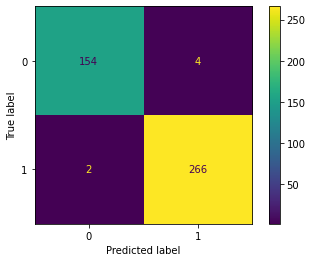

In [42]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# create a confusion matrix for our logistic regression model fit on the scaled training data
plot_confusion_matrix(lr, X_train_scaled, y_train)

<a id='more_metrics'></a>

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
                            roc_curve, roc_auc_score, plot_roc_curve

## Accuracy/Precision/Recall/F_1 Score

We have a bunch of additional metrics, most of which we can figure out from the CM

Question: Define accuracy. What is the accuracy score of our classifier?

**Accuracy** = $\frac{TP + TN}{TP + TN + FP + FN}$

    How often did the model correctly identify a positive or negative. 

In [190]:
# Confirm accuracy in code
accuracy_score(y_train, y_hat_train), accuracy_score(y_test, y_hat_test)

(0.9859154929577465, 0.9790209790209791)

Question: Why might accuracy fail to be a good representation of the quality of a classifier?

    If there is class imbalance, say ratio between 1 and 0 is 9:1, it could predict 1 all the time and still get .90

Question: Define recall. What is the recall score of our classifier?

**Recall** = **Sensitivity** = $\frac{TP}{TP + FN}$

    Recall is how often it correctly identified a true positive

In [185]:
X_test_scaled = ss.transform(X_test)
y_hat_test = lr.predict(X_test_scaled)

In [189]:
# Confirm recall in code
recall_score(y_train, y_hat_train), recall_score(y_test, y_hat_test)

(0.9925373134328358, 0.9775280898876404)

Question: Define precision? What is the precision score of our classifier?

**Precision** = $\frac{TP}{TP + FP}$

    Precision is how often the model predicted a true positive and was actually correct

In [187]:
# Confirm precision in code
precision_score(y_train, y_hat_train), precision_score(y_test, y_hat_test)

(0.9851851851851852, 0.9886363636363636)

Question: Define f1 score? What is the f1 score score of our classifier?

<a id='auc_roc'></a>

$$F_1 = 2 \frac{Pr \cdot Rc}{Pr + Rc} = \frac{2TP}{2TP + FP + FN}$$

    Combination of precision and recall. Higher is better, multiplication of Precision by Recall means good for showing class inbalance

In [188]:
f1_score(y_train, y_hat_train), f1_score(y_test, y_hat_test)

(0.9888475836431226, 0.983050847457627)

## Auc_Roc

The AUC_ROC curve can't be deduced from the confusion matrix.  Describe what the AUC_ROC curve shows. 
Look [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) for some nice visualizations of AUC_ROC.

    The AUC_ROC curve shows well well the model can differentiate classes. ROC curve plots true positive rate vs false positive rate. Higher AUC means classifier is correctly identifying more points. Also kind of says how different versions of the models will perform. The functioning of the model across a range. How the model performs across different thresholds and then we can choose where we want it to be as far as tpr/fpr
    A good AUC_ROC curve is as close to the upper left hand size of the graph as possible.
    There is no hard cutoff for a AUC_ROC score. As long as the AUC is higher than .5, the model is performing better than randomly taking a guess between the two classes

One of the advantages of logistic regression is that it generates a set of probabilities associated with each prediction.  What is the default threshold?  How would decrease or increasing your threshold affect true positive and false positive rates?

    The default is .5. If we increase this threshold, we will get more false positives. Decreasing, less.


For our scaled X_train, generate an array of probabilities associated with the probability of the positive class.

In [73]:
# your code here
pp = lr.predict_proba(X_train_scaled)

In [74]:
pp

array([[3.13192656e-05, 9.99968681e-01],
       [9.97136273e-01, 2.86372729e-03],
       [7.30392396e-04, 9.99269608e-01],
       [9.99996275e-01, 3.72508743e-06],
       [9.99998438e-01, 1.56225670e-06],
       [6.87592936e-01, 3.12407064e-01],
       [1.78880219e-04, 9.99821120e-01],
       [9.42932637e-01, 5.70673632e-02],
       [1.40867549e-04, 9.99859132e-01],
       [9.25542793e-06, 9.99990745e-01],
       [2.46012137e-02, 9.75398786e-01],
       [8.21706343e-04, 9.99178294e-01],
       [1.00000000e+00, 6.18453263e-13],
       [9.99886572e-01, 1.13427902e-04],
       [3.59905547e-05, 9.99964009e-01],
       [9.21976044e-03, 9.90780240e-01],
       [1.77623231e-05, 9.99982238e-01],
       [6.10891915e-08, 9.99999939e-01],
       [4.32816112e-04, 9.99567184e-01],
       [1.84288620e-04, 9.99815711e-01],
       [2.42911638e-03, 9.97570884e-01],
       [9.26619683e-01, 7.33803170e-02],
       [9.63772303e-04, 9.99036228e-01],
       [8.94753245e-04, 9.99105247e-01],
       [3.167009

Now, using those probabilities, create two arrays, one which converts the probabilities to label predictions using the default threshold, and one using a threshold of .4.  How does it affect our metrics?

In [191]:
def prob_threshold(array, threshold):
    zeros = []
    ones = []
    for x in array:
        if x[1] >= threshold:
            ones.append(1)
        else:
            zeros.append(0)
    return len(zeros), len(ones)

pp = lr.predict_proba(X_train_scaled)

prob_threshold(pp, .5), prob_threshold(pp, .4)

((156, 270), (154, 272))

In [79]:
prob_threshold(pp, .5), prob_threshold(pp, .4)

((270, 156), (269, 157))

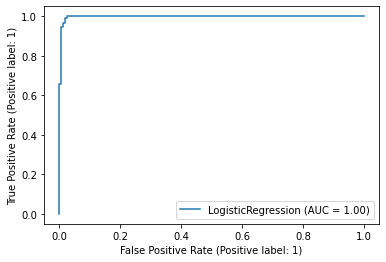

In [83]:
# Plot the AUC_ROC curve for our classifier
plot_roc_curve(lr, X_train_scaled, y_train)

<a id='algos'></a>

# More Algorithms

Much of the sklearn syntax is shared across classifiers and regressors.  Fit, predict, score, and more are methods associated with all sklearn classifiers.  They work differently under the hood. KNN's fit method simply stores the training set in memory. Logistic regressions .fit() does the hard work of calculating coefficients. 

![lazy_george](https://media.giphy.com/media/8TJK6prvRXF6g/giphy.gif)

However, each algo also has specific parameters and methods associated with it.  For example, decision trees have feature importances and logistic has coefficients. KNN has n_neighbors and decision trees has max_depth.


Getting to know the algo's and their associated properties is an important area of study. 

That being said, you now are getting to the point that no matter which algorithm you choose, you can run the code to create a model as long as you have the data in the correct shape. Most importantly, the target is the appropriate form (continuous/categorical) and is isolated from the predictors.

Here are the algos we know so far. 
 - Linear Regression
 - Lasso/Ridge Regression
 - Logistic Regression
 - Naive-Bayes
 - KNN
 - Decision Trees
 
> Note that KNN and decision trees also have regression classes in sklearn.


Here are two datasets from seaborn and sklearn.  Let's work through the process of creating simple models for each.

In [133]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [101]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

    KNN, Decision Tree can work, Different version of logistic regression(might be a default parameter)

In [124]:
from sklearn.preprocessing import LabelEncoder

In [134]:
penguins.drop(columns = 'sex', inplace = True)
penguins.dropna(inplace = True)

In [135]:
# split target from predictors
y = LabelEncoder().fit_transform(penguins['species'])
X = penguins.drop(columns = 'species')

In [136]:
# isolate numeric predictors
X = X[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

# Scale appropriately
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [129]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

In [138]:
# instantiate appropriate model and fit to appropriate part of data.
knn = KNeighborsClassifier(n_neighbors = 5,
                           metric = 'euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [139]:
# Create a set of predictions
y_hat_train = knn.predict(X_train_scaled)
y_hat_test = knn.predict(X_test_scaled)


In [141]:
y_hat_train

array([0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0,
       2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

In [152]:
from sklearn.metrics import classification_report

In [155]:
# Create and analyze appropriate metrics
print(classification_report(y_train, y_hat_train))
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.93      0.96        55
           2       1.00      1.00      1.00        94

    accuracy                           0.98       256
   macro avg       0.99      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        29

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86



In [156]:
import pandas as pd
from sklearn.datasets import load_boston
data = load_boston()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

    Linear Regression

In [ ]:
# split target from predictors

In [ ]:
# isolate numeric predictors

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)
# Scale appropriately
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [163]:
from sklearn.linear_model import LinearRegression

In [166]:
# instantiate appropriate model and fit to appropriate part of data.
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [167]:
# Create a set of predictions

y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)


In [171]:
# Create and analyze appropriate metrics
lr.score(X_train_scaled, y_train)

0.748087259862344